# Importando datos desde una planilla excel usando pandas

In [1]:
import pandas as pd
pd.options.display.float_format='{:,.0f}'.format
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 10)

In [2]:
pib = pd.read_excel("data/GDPpercapita.xlsx", 
                    sheet_name="OECD.Stat export",
                    skiprows=4,
                    skipfooter=1,
                    usecols="A,C:T")

In [3]:
pib.head()

,Year,2001,2002,2003,2004,...,2014,2015,2016,2017,2018
0,Metropolitan areas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,AUS: Australia,..,..,..,..,...,..,..,..,..,..
2,AUS01: Greater Sydney,43313,44008,45424,45837,...,48510,50075,50519,50578,49860
3,AUS02: Greater Melbourne,40125,40894,41602,42188,...,42114,42928,42671,43025,42674
4,AUS03: Greater Brisbane,37580,37564,39080,40762,...,43754,44388,45723,46876,46640


In [8]:
pib.drop(index=0, inplace=True)

In [10]:
pib.rename(columns={"Year":'Area_Metropolitana'}, inplace=True)

In [11]:
pib.head()

,Area_Metropolitana,2001,2002,2003,2004,...,2014,2015,2016,2017,2018
1,AUS: Australia,..,..,..,..,...,..,..,..,..,..
2,AUS01: Greater Sydney,43313,44008,45424,45837,...,48510,50075,50519,50578,49860
3,AUS02: Greater Melbourne,40125,40894,41602,42188,...,42114,42928,42671,43025,42674
4,AUS03: Greater Brisbane,37580,37564,39080,40762,...,43754,44388,45723,46876,46640
5,AUS04: Greater Perth,45713,47371,48719,51020,...,70395,66544,66032,66424,70390


In [12]:
pib.columns

Index(['Area_Metropolitana', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [13]:
pib.Area_Metropolitana.str.startswith(' ').any()

True

In [14]:
pib.Area_Metropolitana.str.endswith(' ').any()

True

Voy a reemplazar los valores de la columna `Area_Metropolitana` con los mismos valores aplicando el método `strip` de la clase `str`.  
`strip` eliminará los espacios de los strings en las filas de la columna `Area_Metropolitana`. 

In [16]:
pib.Area_Metropolitana = pib.Area_Metropolitana.str.strip()

In [17]:
pib.Area_Metropolitana.str.startswith(' ').any()

False

In [18]:
pib.Area_Metropolitana.str.endswith(' ').any()

False

In [19]:
pib.dtypes

Area_Metropolitana    object
2001                  object
2002                  object
2003                  object
2004                  object
2005                  object
2006                  object
2007                  object
2008                  object
2009                  object
2010                  object
2011                  object
2012                  object
2013                  object
2014                  object
2015                  object
2016                  object
2017                  object
2018                  object
dtype: object

In [21]:
pib.describe()

,Area_Metropolitana,2001,2002,2003,2004,...,2014,2015,2016,2017,2018
count,701,701,701,701,701,...,701,701,701,701,701
unique,701,422,438,439,437,...,478,479,480,445,440
top,USA75: Sedgwick,..,..,..,..,...,..,..,..,..,..
freq,1,277,261,261,261,...,221,221,221,256,260


In [22]:
for col in pib.columns[1:]:
    print(col)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [24]:
for col in pib.columns[1:]:
    pib[col]=pd.to_numeric(pib[col], errors='coerce')
    pib.rename(columns={col:'pib'+col}, inplace=True)

In [25]:
pib.head()

,Area_Metropolitana,pib2001,pib2002,pib2003,pib2004,...,pib2014,pib2015,pib2016,pib2017,pib2018
1,AUS: Australia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,AUS01: Greater Sydney,"43,313","44,008","45,424","45,837",...,"48,510","50,075","50,519","50,578","49,860"
3,AUS02: Greater Melbourne,"40,125","40,894","41,602","42,188",...,"42,114","42,928","42,671","43,025","42,674"
4,AUS03: Greater Brisbane,"37,580","37,564","39,080","40,762",...,"43,754","44,388","45,723","46,876","46,640"
5,AUS04: Greater Perth,"45,713","47,371","48,719","51,020",...,"70,395","66,544","66,032","66,424","70,390"


In [26]:
pib.dtypes

Area_Metropolitana     object
pib2001               float64
pib2002               float64
pib2003               float64
pib2004               float64
pib2005               float64
pib2006               float64
pib2007               float64
pib2008               float64
pib2009               float64
pib2010               float64
pib2011               float64
pib2012               float64
pib2013               float64
pib2014               float64
pib2015               float64
pib2016               float64
pib2017               float64
pib2018               float64
dtype: object

In [27]:
pib.describe()

,pib2001,pib2002,pib2003,pib2004,pib2005,...,pib2014,pib2015,pib2016,pib2017,pib2018
count,424,440,440,440,447,...,480,480,480,445,441
mean,"41,264","41,015","41,553","42,473","42,881",...,"44,942","45,802","46,244","47,489","48,033"
std,"11,878","12,537","12,457","12,622","13,172",...,"14,422","14,949","14,939","15,464","15,720"
min,"10,988","11,435","11,969","12,777","13,062",...,"2,683","2,761","2,796","2,745","2,832"
25%,"33,139","32,636","33,285","33,864","33,736",...,"35,766","36,128","36,585","37,316","37,908"
50%,"39,544","39,684","40,390","41,200","41,609",...,"42,778","43,238","43,932","45,385","46,057"
75%,"47,972","48,611","49,355","50,468","51,025",...,"53,737","54,134","54,450","56,023","56,638"
max,"91,488","93,566","98,123","96,242","101,084",...,"121,011","121,623","117,879","122,242","127,468"


In [28]:
pib.shape

(701, 19)

In [30]:
pib.reset_index(inplace=True)

In [33]:
pib.drop(columns=["index"], inplace=True)

In [34]:
pib

,Area_Metropolitana,pib2001,pib2002,pib2003,pib2004,...,pib2014,pib2015,pib2016,pib2017,pib2018
0,AUS: Australia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,AUS01: Greater Sydney,"43,313","44,008","45,424","45,837",...,"48,510","50,075","50,519","50,578","49,860"
2,AUS02: Greater Melbourne,"40,125","40,894","41,602","42,188",...,"42,114","42,928","42,671","43,025","42,674"
3,AUS03: Greater Brisbane,"37,580","37,564","39,080","40,762",...,"43,754","44,388","45,723","46,876","46,640"
4,AUS04: Greater Perth,"45,713","47,371","48,719","51,020",...,"70,395","66,544","66,032","66,424","70,390"
...,...,...,...,...,...,...,...,...,...,...,...
696,USA164: Linn,"53,047","51,751","54,894","58,660",...,"67,125","69,490","69,645","67,553","68,683"
697,USA165: Lafayette (IN),"38,057","38,723","39,173","40,412",...,"41,680","41,763","42,370","42,562","44,206"
698,USA167: Weber,"34,592","34,997","35,587","35,776",...,"37,418","39,144","39,950","40,846","40,930"
699,USA169: Cass,"44,597","46,856","49,043","49,134",...,"57,475","57,402","56,600","55,201","56,094"


In [36]:
pib.dropna(subset=pib.columns[1:], how="all", inplace=True)

In [38]:
pib.describe()

,pib2001,pib2002,pib2003,pib2004,pib2005,...,pib2014,pib2015,pib2016,pib2017,pib2018
count,424,440,440,440,447,...,480,480,480,445,441
mean,"41,264","41,015","41,553","42,473","42,881",...,"44,942","45,802","46,244","47,489","48,033"
std,"11,878","12,537","12,457","12,622","13,172",...,"14,422","14,949","14,939","15,464","15,720"
min,"10,988","11,435","11,969","12,777","13,062",...,"2,683","2,761","2,796","2,745","2,832"
25%,"33,139","32,636","33,285","33,864","33,736",...,"35,766","36,128","36,585","37,316","37,908"
50%,"39,544","39,684","40,390","41,200","41,609",...,"42,778","43,238","43,932","45,385","46,057"
75%,"47,972","48,611","49,355","50,468","51,025",...,"53,737","54,134","54,450","56,023","56,638"
max,"91,488","93,566","98,123","96,242","101,084",...,"121,011","121,623","117,879","122,242","127,468"


In [39]:
pib.head()

,Area_Metropolitana,pib2001,pib2002,pib2003,pib2004,...,pib2014,pib2015,pib2016,pib2017,pib2018
1,AUS01: Greater Sydney,"43,313","44,008","45,424","45,837",...,"48,510","50,075","50,519","50,578","49,860"
2,AUS02: Greater Melbourne,"40,125","40,894","41,602","42,188",...,"42,114","42,928","42,671","43,025","42,674"
3,AUS03: Greater Brisbane,"37,580","37,564","39,080","40,762",...,"43,754","44,388","45,723","46,876","46,640"
4,AUS04: Greater Perth,"45,713","47,371","48,719","51,020",...,"70,395","66,544","66,032","66,424","70,390"
5,AUS05: Greater Adelaide,"36,505","37,194","37,634","37,399",...,"40,306","40,295","39,737","40,115","39,924"


In [40]:
pib.Area_Metropolitana.count()

480

In [41]:
pib.Area_Metropolitana.nunique()

480

In [42]:
pib.set_index('Area_Metropolitana', inplace=True)

In [43]:
pib

,pib2001,pib2002,pib2003,pib2004,pib2005,...,pib2014,pib2015,pib2016,pib2017,pib2018
Area_Metropolitana,,,,,,,,,,,
AUS01: Greater Sydney,"43,313","44,008","45,424","45,837","45,423",...,"48,510","50,075","50,519","50,578","49,860"
AUS02: Greater Melbourne,"40,125","40,894","41,602","42,188","41,484",...,"42,114","42,928","42,671","43,025","42,674"
AUS03: Greater Brisbane,"37,580","37,564","39,080","40,762","42,976",...,"43,754","44,388","45,723","46,876","46,640"
AUS04: Greater Perth,"45,713","47,371","48,719","51,020","55,278",...,"70,395","66,544","66,032","66,424","70,390"
AUS05: Greater Adelaide,"36,505","37,194","37,634","37,399","37,604",...,"40,306","40,295","39,737","40,115","39,924"
...,...,...,...,...,...,...,...,...,...,...,...
USA164: Linn,"53,047","51,751","54,894","58,660","60,195",...,"67,125","69,490","69,645","67,553","68,683"
USA165: Lafayette (IN),"38,057","38,723","39,173","40,412","40,285",...,"41,680","41,763","42,370","42,562","44,206"
USA167: Weber,"34,592","34,997","35,587","35,776","37,613",...,"37,418","39,144","39,950","40,846","40,930"


In [44]:
pib['pib2001']

Area_Metropolitana
AUS01: Greater Sydney      43,313
AUS02: Greater Melbourne   40,125
AUS03: Greater Brisbane    37,580
AUS04: Greater Perth       45,713
AUS05: Greater Adelaide    36,505
                            ...  
USA164: Linn               53,047
USA165: Lafayette (IN)     38,057
USA167: Weber              34,592
USA169: Cass               44,597
USA170: Benton (AR)        41,988
Name: pib2001, Length: 480, dtype: float64

<AxesSubplot:>

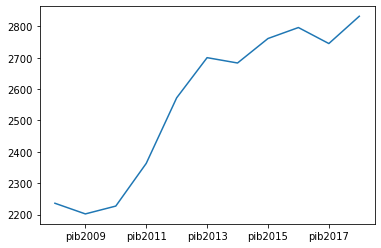

In [46]:
pib.loc['CL011: Santiago'].plot()